# Deep Learning Assignment 1

### Guanzhi Wang
### 9/10/2019

## Problem 1

Import packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV

In [21]:
#Read the data
#Drop na and non-numeric columns
#Split the data by X and Y
hitters=pd.read_csv("Hitters.csv")
hitters=hitters.dropna()
hitters=hitters.rename(columns = {'Unnamed: 0':'Name'})
names=hitters["Name"]
hitters=hitters.select_dtypes([np.number])

Y=hitters['Salary']

X=hitters.drop('Salary',axis=1)

### Lasso

The last three predictors are Hits,CRuns,CRBI.


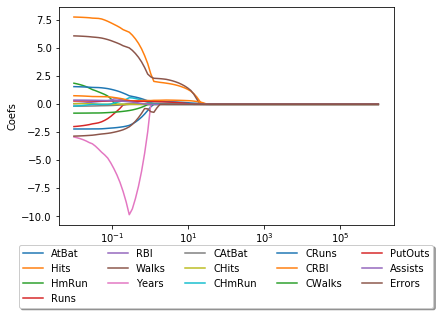

In [22]:
#Plot the coefficient trajectories. 

alphas = 10**np.linspace(6,-2,100)*0.5
alphas
lasso = Lasso(max_iter=100000,normalize = True)
coefs = []
legend=X.columns.tolist()
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X,Y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefs')
plt.legend(legend,loc='upper center',bbox_to_anchor=(0.5, -0.07),shadow=True, ncol=5)

for a in coefs:
    if (a>0).sum() == 3:
        #print(a)
        break
print("The last three predictors are "+legend[1]+","+legend[10]+","+legend[11]+".")

In [23]:
#Method1: gridsearch
parameters={'alpha':list(alphas)}
lasso_cv=GridSearchCV(lasso, parameters,scoring="neg_mean_squared_error",cv=10)
lasso_cv.fit(X,Y)
print(lasso_cv.best_score_)
print('___________')
print(lasso_cv.best_params_)
print('___________')
print(lasso_cv.best_index_)
print('___________')
print(lasso_cv.best_estimator_)

#Method2: LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, Y)
print('the optimal alpha is: {}'.format(lassocv.alpha_))

-116273.4332669456
___________
{'alpha': 0.06765238872899024}
___________
85
___________
Lasso(alpha=0.06765238872899024, copy_X=True, fit_intercept=True,
      max_iter=100000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
the optimal alpha is: 0.0635481759985745


/Users/wangguanzhi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X,Y)
print(lasso.coef_)

lasso.set_params(alpha=0.06765238872899024)
lasso.fit(X,Y)
print(lasso.coef_)

[-2.08295369  7.04101066  0.         -0.68261512  0.49655158  5.51178063
 -6.10762506 -0.08706575  0.          0.15646752  1.22806115  0.58382084
 -0.69060051  0.29269419  0.30437223 -2.4507947 ]
[-2.07316966  6.99574893  0.         -0.6079683   0.4843      5.4773209
 -6.30488944 -0.08250033  0.          0.17683343  1.20136744  0.57133453
 -0.68319178  0.29239459  0.3004192  -2.42930302]


So the best alpha is about 0.0677. And there are 14 predictors remain.

### Ridge

/Users/wangguanzhi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-116554.66897754413
___________
{'alpha': 0.006609705742330144}
___________
98
___________
Ridge(alpha=0.006609705742330144, copy_X=True, fit_intercept=True,
      max_iter=1000000, normalize=True, random_state=None, solver='auto',
      tol=0.001)


/Users/wangguanzhi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


the optimal alpha is: 0.006609705742330144


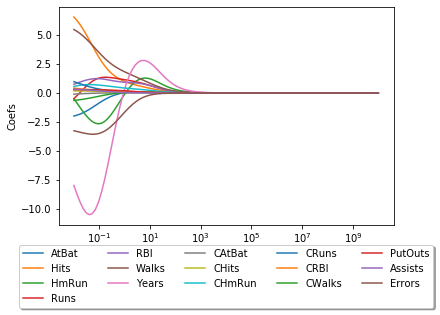

In [25]:
#Plot coefficient trajectories.
alphas = 10**np.linspace(10,-2,100)*0.5
ridge=Ridge(max_iter=1000000,normalize=True)
coefs2=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X,Y)
    coefs2.append(ridge.coef_)

bx = plt.gca()

bx.plot(alphas*2, coefs2)
bx.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefs')
plt.legend(legend,loc='upper center',bbox_to_anchor=(0.5, -0.07),shadow=True, ncol=5)

#Method1: Gridsearch
parameters={'alpha':list(alphas)}
ridge_cv=GridSearchCV(ridge, parameters,scoring="neg_mean_squared_error",cv=10)
ridge_cv.fit(X,Y)
print(ridge_cv.best_score_)
print('___________')
print(ridge_cv.best_params_)
print('___________')
print(ridge_cv.best_index_)
print('___________')
print(ridge_cv.best_estimator_)

#Method2: RidgeCV
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True,cv=10)
ridgecv.fit(X, Y)
print('the optimal alpha is: {}'.format(ridgecv.alpha_))

So the best alpha is about 0.0066.

## Problem 2

If a model is very simple and has very few parameters then it may have high bias and low variance. If a model has large number of parameters then it’s going to have high variance and low bias. In that case, the bias-variance tradeoff is about to find the balance without overfitting and underfitting the data.

In our assignment, when we start the shrinkage, we are adding the bias but reducing the variance. We knocked out some predictors by changing their coefficients to 0.